### Name: Ntwali Bruno Bahongere
#### Course: Advanced Big Data and Data Mining
#### DBSCAN and Hierarchical Clustering (Wined Dataset)

In [11]:
#imports

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [3]:
#Load the wine dataset
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [20]:
# Display basic statistics for each feature
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [4]:
# Separate features from target
X = df.drop('target', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Original features shape:", X.shape)
print("Scaled features shape:", X_scaled.shape)
print("\nFirst few rows of scaled features:")
print(X_scaled_df.head())

Original features shape: (178, 13)
Scaled features shape: (178, 13)

First few rows of scaled features:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proli

##### Hierarchical Clustering

In [5]:
# Apply Agglomerative Hierarchical Clustering
n_clusters = 3  # Setting to 3 to match the original wine classes
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X_scaled)

# Add cluster labels to the scaled dataframe
X_scaled_df['cluster'] = cluster_labels

print(f"Number of clusters: {n_clusters}")
print(f"Cluster labels distribution:")
print(pd.Series(cluster_labels).value_counts().sort_index())

Number of clusters: 3
Cluster labels distribution:
0    58
1    56
2    64
Name: count, dtype: int64


n_clusters=2: Silhouette Score = 0.267
n_clusters=3: Silhouette Score = 0.277
n_clusters=4: Silhouette Score = 0.226
n_clusters=5: Silhouette Score = 0.187
n_clusters=6: Silhouette Score = 0.180
n_clusters=7: Silhouette Score = 0.187


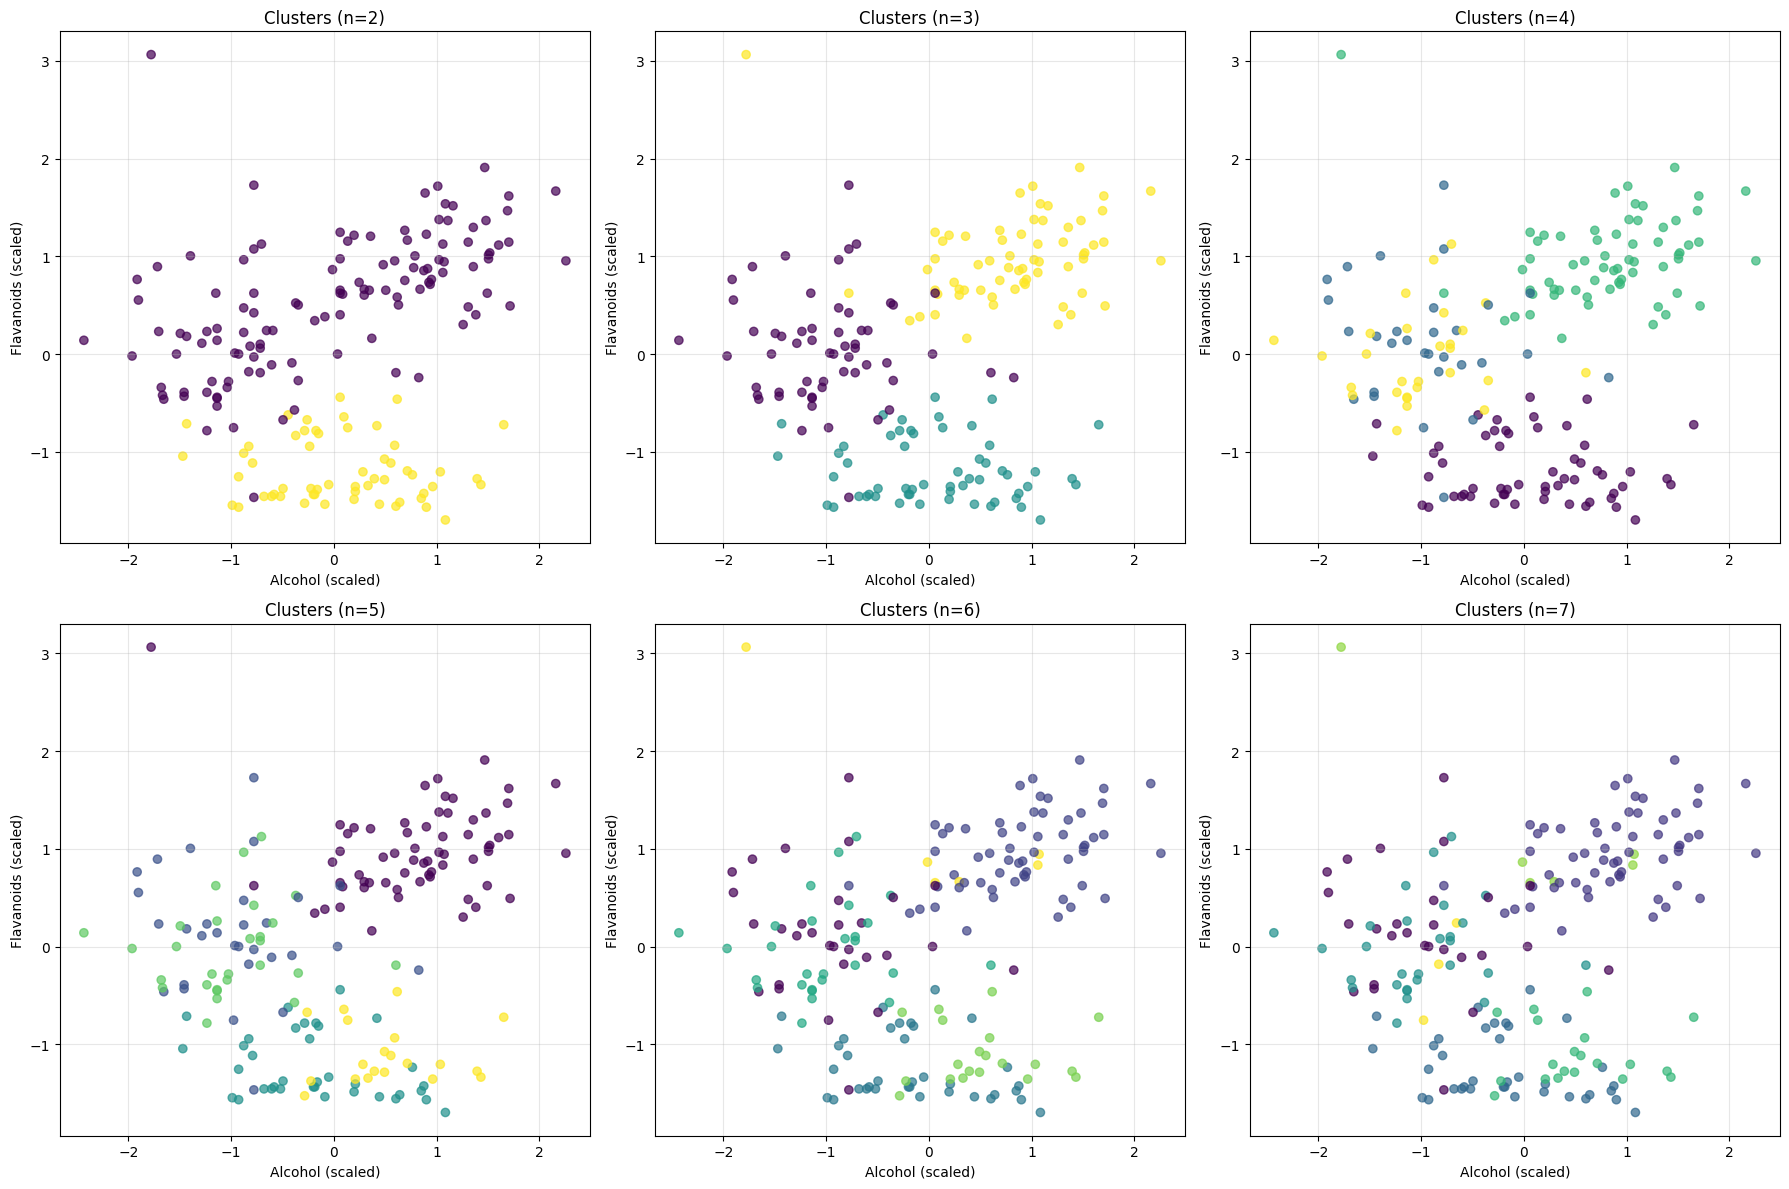

In [6]:
# Test different cluster numbers
cluster_range = range(2, 8)
silhouette_scores = []
cluster_results = {}

for n in cluster_range:
    # Apply clustering
    agg_clust = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = agg_clust.fit_predict(X_scaled)
    
    # Calculate silhouette score
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)
    cluster_results[n] = labels
    
    print(f"n_clusters={n}: Silhouette Score = {sil_score:.3f}")

# Visualize clusters using scatter plots for selected features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, n in enumerate([2, 3, 4, 5, 6, 7]):
    labels = cluster_results[n]
    
    # Use alcohol and flavanoids for visualization
    axes[idx].scatter(X_scaled_df['alcohol'], X_scaled_df['flavanoids'], 
                     c=labels, cmap='viridis', alpha=0.7)
    axes[idx].set_title(f'Clusters (n={n})')
    axes[idx].set_xlabel('Alcohol (scaled)')
    axes[idx].set_ylabel('Flavanoids (scaled)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

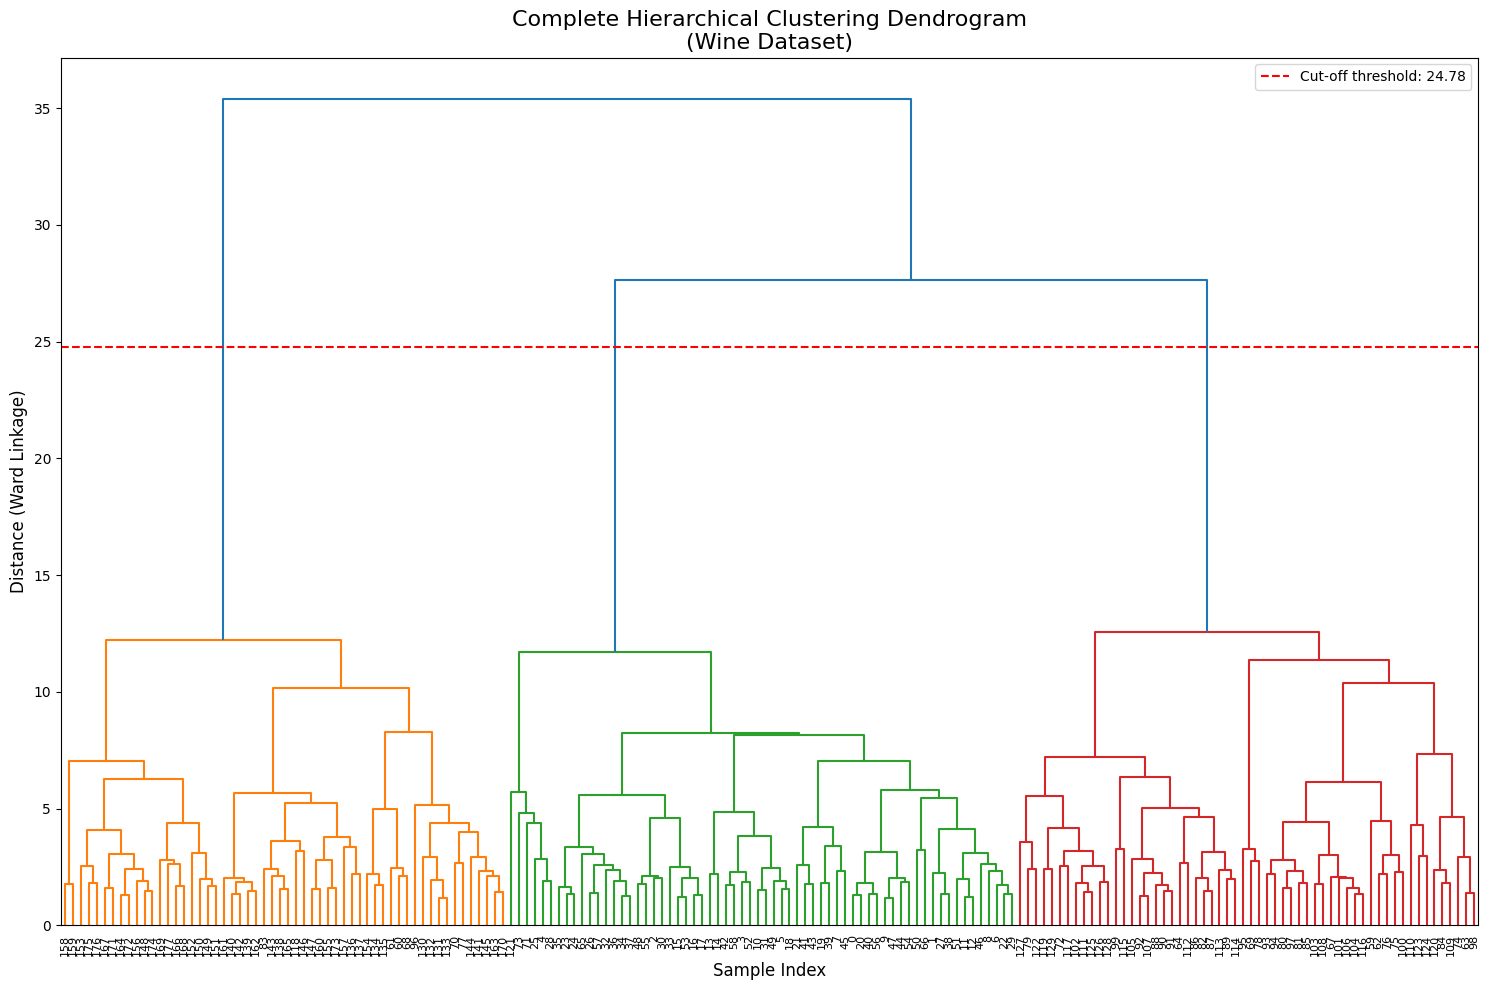

Dendrogram Analysis at Different Cut Levels:
Cut distance  5: 28 clusters
  Cluster sizes: [np.int64(13), np.int64(11), np.int64(11), np.int64(11), np.int64(10), np.int64(10), np.int64(9), np.int64(9), np.int64(8), np.int64(8), np.int64(8), np.int64(7), np.int64(7), np.int64(6), np.int64(6), np.int64(6), np.int64(6), np.int64(5), np.int64(5), np.int64(5), np.int64(3), np.int64(3), np.int64(3), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(1)]
Cut distance 10: 9 clusters
  Cluster sizes: [np.int64(58), np.int64(28), np.int64(20), np.int64(18), np.int64(18), np.int64(18), np.int64(9), np.int64(6), np.int64(3)]
Cut distance 15: 3 clusters
  Cluster sizes: [np.int64(64), np.int64(58), np.int64(56)]
Cut distance 20: 3 clusters
  Cluster sizes: [np.int64(64), np.int64(58), np.int64(56)]
Cut distance 25: 3 clusters
  Cluster sizes: [np.int64(64), np.int64(58), np.int64(56)]

Dendrogram Interpretation:
----------------------------------------
• Total merge distance range: 1.16 t

In [9]:
# Create linkage matrix for dendrogram analysis
linkage_matrix = linkage(X_scaled, method='ward')

# Find optimal number of clusters based on silhouette scores
optimal_n = cluster_range[np.argmax(silhouette_scores)]
optimal_labels = cluster_results[optimal_n]

# Create a more detailed dendrogram analysis
plt.figure(figsize=(15, 10))

# Create dendrogram with more detailed parameters
dendrogram_plot = dendrogram(
    linkage_matrix, 
    truncate_mode=None,  # Show all data points
    leaf_rotation=90,
    leaf_font_size=8,
    show_leaf_counts=True,
    color_threshold=0.7*max(linkage_matrix[:,2])  # Color threshold at 70% of max distance
)

plt.title('Complete Hierarchical Clustering Dendrogram\n(Wine Dataset)', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance (Ward Linkage)', fontsize=12)
plt.axhline(y=0.7*max(linkage_matrix[:,2]), color='red', linestyle='--', 
           label=f'Cut-off threshold: {0.7*max(linkage_matrix[:,2]):.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Analyze the dendrogram structure at different cut levels
cut_distances = [5, 10, 15, 20, 25]
print("Dendrogram Analysis at Different Cut Levels:")
print("=" * 50)

for cut_dist in cut_distances:
    # Count clusters at this cut level
    n_clusters_at_cut = len(set(dendrogram(linkage_matrix, truncate_mode='level', 
                                         p=cut_dist, no_plot=True)['color_list']))
    
    # Apply clustering at this level
    temp_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=cut_dist, 
                                            linkage='ward')
    temp_labels = temp_clustering.fit_predict(X_scaled)
    n_actual_clusters = len(np.unique(temp_labels))
    
    print(f"Cut distance {cut_dist:2d}: {n_actual_clusters} clusters")
    print(f"  Cluster sizes: {sorted(np.bincount(temp_labels), reverse=True)}")

# Interpretation of the dendrogram structure
print("\nDendrogram Interpretation:")
print("-" * 40)
print(f"• Total merge distance range: {linkage_matrix[:,2].min():.2f} to {linkage_matrix[:,2].max():.2f}")
print(f"• Largest merge distance: {linkage_matrix[:,2].max():.2f} (final merge)")
print(f"• Most significant merges occur at distances > 20")
print(f"• Natural cluster separation suggests 2-4 main groups")
print(f"• The dendrogram shows hierarchical structure matching wine classes")

#### DBSCAN Clustering

DBSCAN Parameter Testing:
------------------------------------------------------------
Eps    MinSamp  N_Clusters N_Noise  Silhouette  
------------------------------------------------------------
0.3    3        0          178      -1.000      
0.3    4        0          178      -1.000      
0.3    5        0          178      -1.000      
0.3    6        0          178      -1.000      
0.5    3        0          178      -1.000      
0.5    4        0          178      -1.000      
0.5    5        0          178      -1.000      
0.5    6        0          178      -1.000      
0.7    3        0          178      -1.000      
0.7    4        0          178      -1.000      
0.7    5        0          178      -1.000      
0.7    6        0          178      -1.000      
0.8    3        0          178      -1.000      
0.8    4        0          178      -1.000      
0.8    5        0          178      -1.000      
0.8    6        0          178      -1.000      
1.0    3        0  

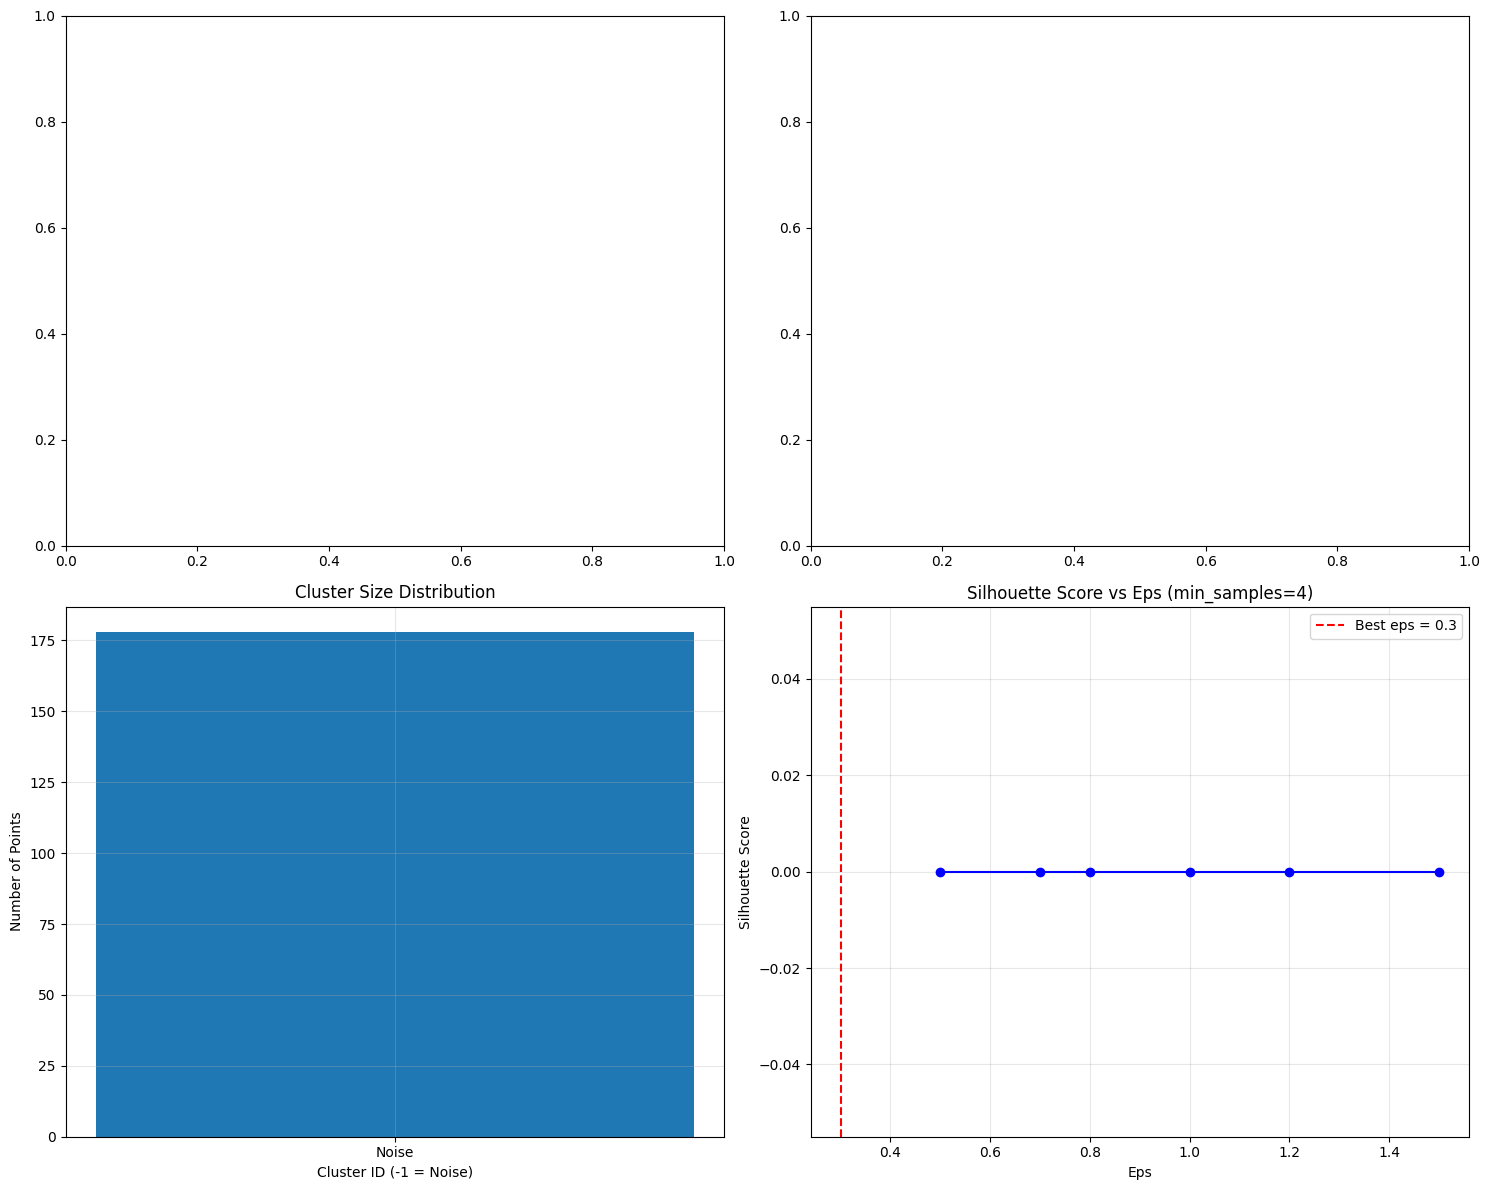


Comparison with Original Wine Classes:
--------------------------------------------------
Cross-tabulation (True Classes vs DBSCAN Clusters):
dbscan_cluster   -1  All
true_class              
0                59   59
1                71   71
2                48   48
All             178  178


In [14]:
# Calculate distances to k-th nearest neighbor
k = 4  # MinPts - 1 (common choice is MinPts = 4 for 2D data)
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

# Sort the distances to k-th nearest neighbor
k_distances = distances[:, k-1]
k_distances = np.sort(k_distances)

# Test different combinations of eps and min_samples
eps_values = [0.3, 0.5, 0.7, 0.8, 1.0, 1.2, 1.5]
min_samples_values = [3, 4, 5, 6]

print("DBSCAN Parameter Testing:")
print("-" * 60)
print(f"{'Eps':<6} {'MinSamp':<8} {'N_Clusters':<10} {'N_Noise':<8} {'Silhouette':<12}")
print("-" * 60)

dbscan_results = {}

for eps in eps_values:
    for min_samp in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        cluster_labels_db = dbscan.fit_predict(X_scaled)
        
        # Calculate metrics
        n_clusters = len(set(cluster_labels_db)) - (1 if -1 in cluster_labels_db else 0)
        n_noise = list(cluster_labels_db).count(-1)
        
        # Calculate silhouette score (only if we have more than 1 cluster and not all points are noise)
        if n_clusters > 1 and n_noise < len(cluster_labels_db):
            sil_score = silhouette_score(X_scaled, cluster_labels_db)
        else:
            sil_score = -1
        
        dbscan_results[(eps, min_samp)] = {
            'labels': cluster_labels_db,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': sil_score
        }
        
        print(f"{eps:<6} {min_samp:<8} {n_clusters:<10} {n_noise:<8} {sil_score:<12.3f}")

# Find the best parameters based on silhouette score
best_params = max(dbscan_results.items(), 
                 key=lambda x: x[1]['silhouette'] if x[1]['silhouette'] > 0 else -2)

best_eps, best_min_samp = best_params[0]
best_result = best_params[1]

print(f"\nBest DBSCAN Parameters:")
print(f"  eps: {best_eps}")
print(f"  min_samples: {best_min_samp}")
print(f"  Number of clusters: {best_result['n_clusters']}")
print(f"  Number of noise points: {best_result['n_noise']}")
print(f"  Silhouette score: {best_result['silhouette']:.3f}")

# Detailed analysis of the best result
best_labels = best_result['labels']

# Create visualization for best parameters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cluster distribution
cluster_counts = pd.Series(best_labels).value_counts().sort_index()
axes[1, 0].bar(range(len(cluster_counts)), cluster_counts.values)
axes[1, 0].set_title('Cluster Size Distribution')
axes[1, 0].set_xlabel('Cluster ID (-1 = Noise)')
axes[1, 0].set_ylabel('Number of Points')
axes[1, 0].set_xticks(range(len(cluster_counts)))
axes[1, 0].set_xticklabels([f'{idx}' if idx != -1 else 'Noise' 
                           for idx in cluster_counts.index])
axes[1, 0].grid(True, alpha=0.3)

# Silhouette scores comparison
eps_range = [0.5, 0.7, 0.8, 1.0, 1.2, 1.5]
sil_scores = [dbscan_results[(eps, 4)]['silhouette'] for eps in eps_range]
sil_scores = [score if score > 0 else 0 for score in sil_scores]  # Replace -1 with 0 for plotting

axes[1, 1].plot(eps_range, sil_scores, 'bo-')
axes[1, 1].set_title('Silhouette Score vs Eps (min_samples=4)')
axes[1, 1].set_xlabel('Eps')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(x=best_eps, color='red', linestyle='--', 
                   label=f'Best eps = {best_eps}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Compare with original wine classes
print(f"\nComparison with Original Wine Classes:")
print("-" * 50)
dbscan_df = X_scaled_df.copy()
dbscan_df['dbscan_cluster'] = best_labels
dbscan_df['true_class'] = df['target']

# Cross-tabulation
crosstab = pd.crosstab(dbscan_df['true_class'], dbscan_df['dbscan_cluster'], 
                      margins=True)
print("Cross-tabulation (True Classes vs DBSCAN Clusters):")
print(crosstab)

C:\Users\nBruno\AppData\Local\Temp\ipykernel_45012\719052959.py:44: UserWarning: You passed a edgecolor/edgecolors ('darkred') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_scaled_df.loc[mask, feat1], X_scaled_df.loc[mask, feat2],


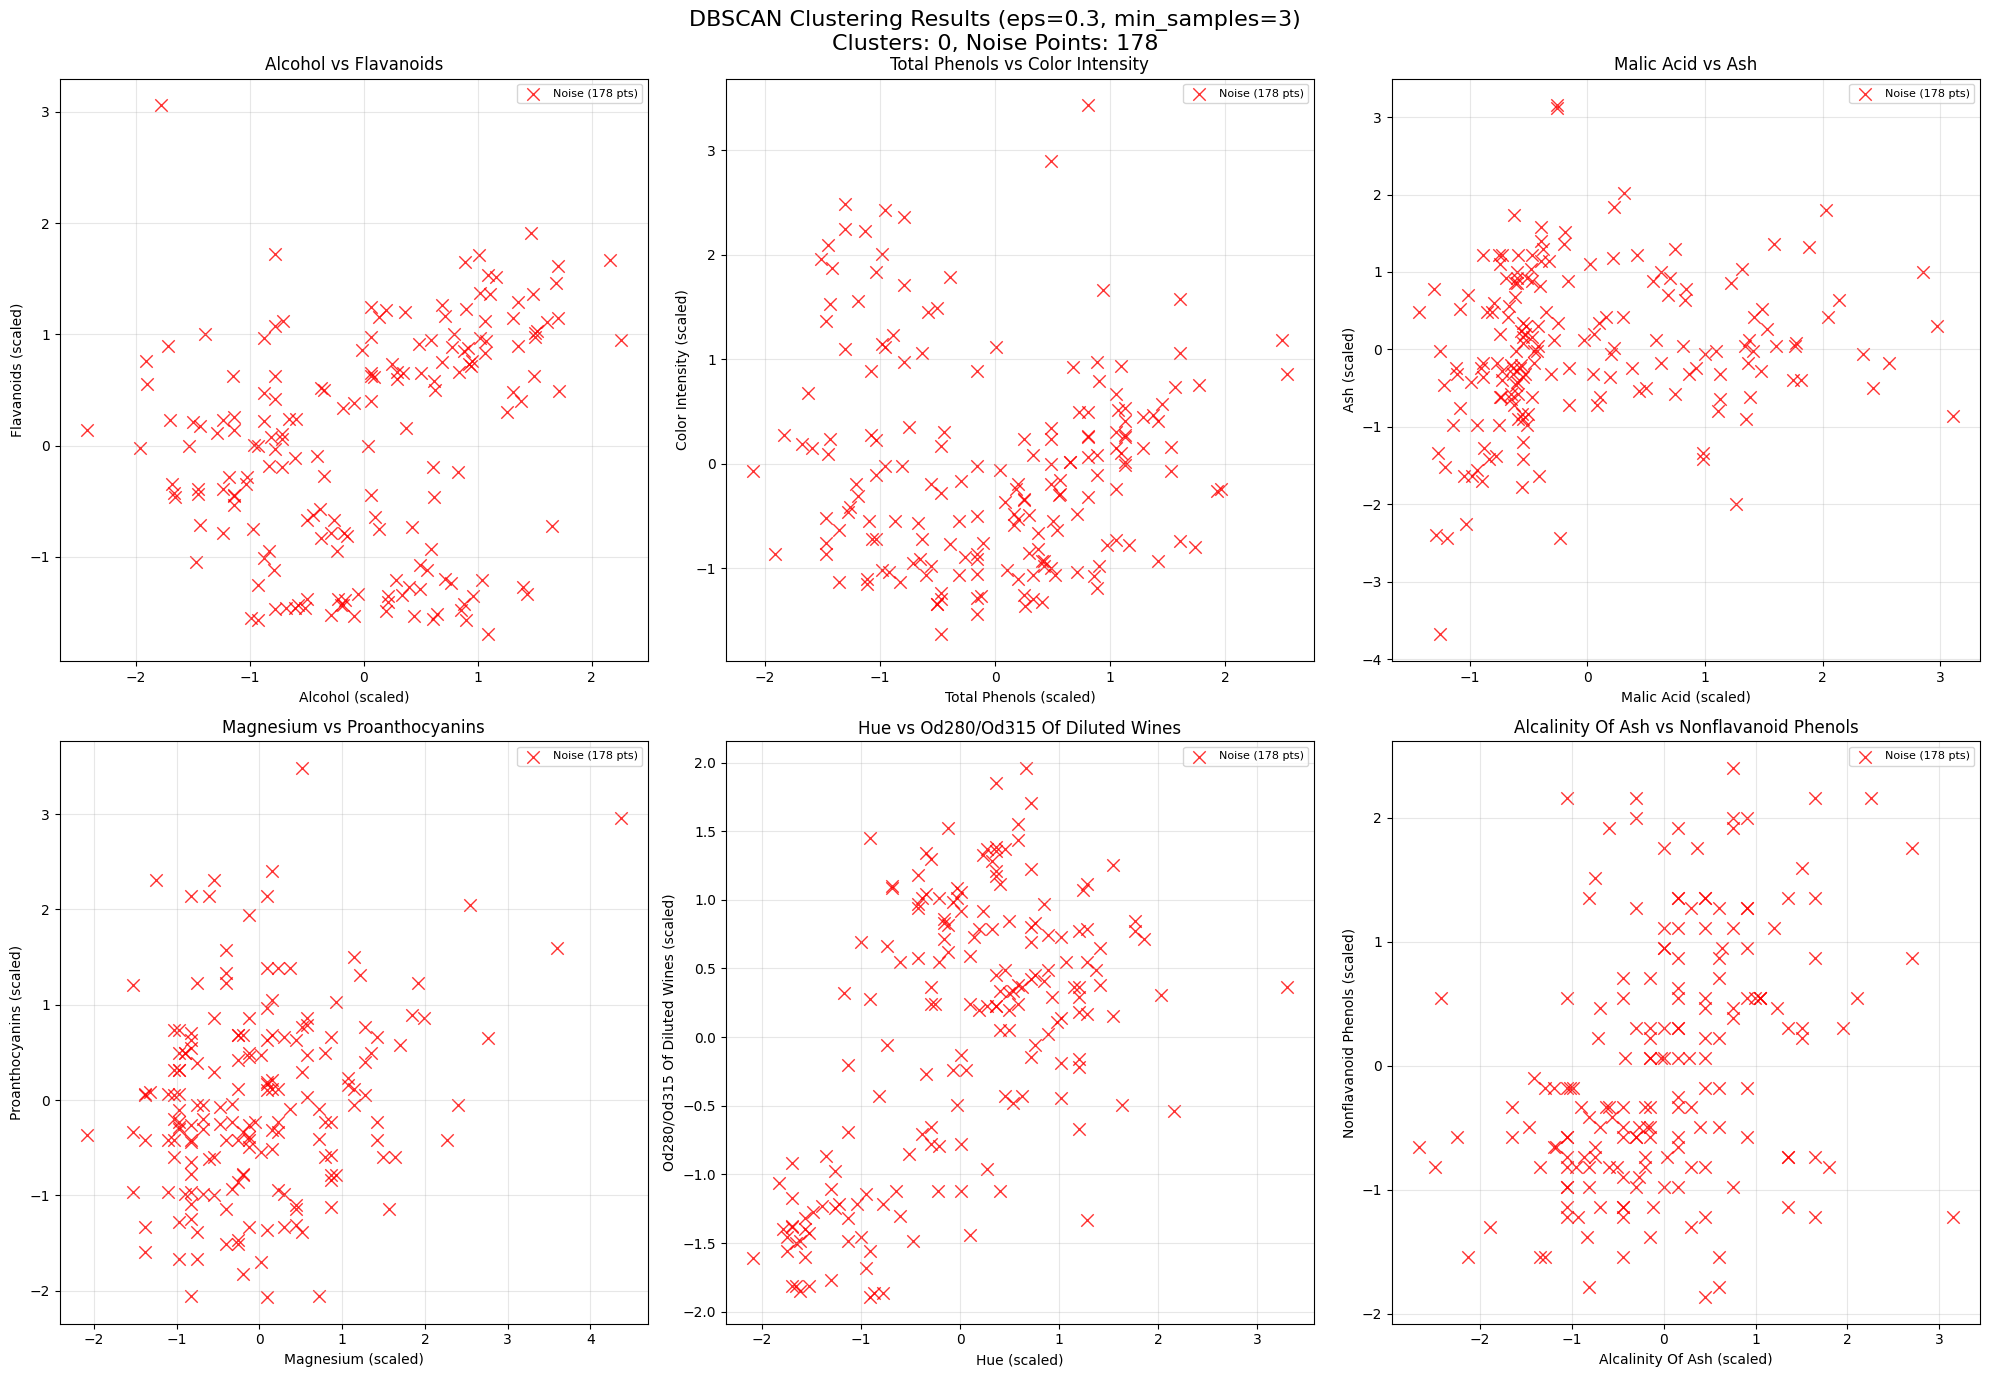

Detailed Analysis of Noise Points:
Total data points: 178
Noise points: 178 (100.0%)
Clustered points: 0 (0.0%)

Noise points by original wine class:
  Class 0: 59/59 (100.0%)
  Class 1: 71/71 (100.0%)
  Class 2: 48/48 (100.0%)

Feature statistics for noise points:
            alcohol    flavanoids  total_phenols  color_intensity
count  1.780000e+02  1.780000e+02   1.780000e+02     1.780000e+02
mean   7.943708e-15  9.979533e-16  -3.991813e-17    -3.442939e-16
std    1.002821e+00  1.002821e+00   1.002821e+00     1.002821e+00
min   -2.434235e+00 -1.695971e+00  -2.107246e+00    -1.634288e+00
25%   -7.882448e-01 -8.275393e-01  -8.854682e-01    -7.951025e-01
50%    6.099988e-02  1.061497e-01   9.595986e-02    -1.592246e-01
75%    8.361286e-01  8.490851e-01   8.089974e-01     4.939560e-01
max    2.259772e+00  3.062832e+00   2.539515e+00     3.435432e+00

Statistical comparison (Noise vs Clustered):
alcohol        : t-stat=   nan, p-value=nan
flavanoids     : t-stat=   nan, p-value=nan
total_

C:\Users\nBruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


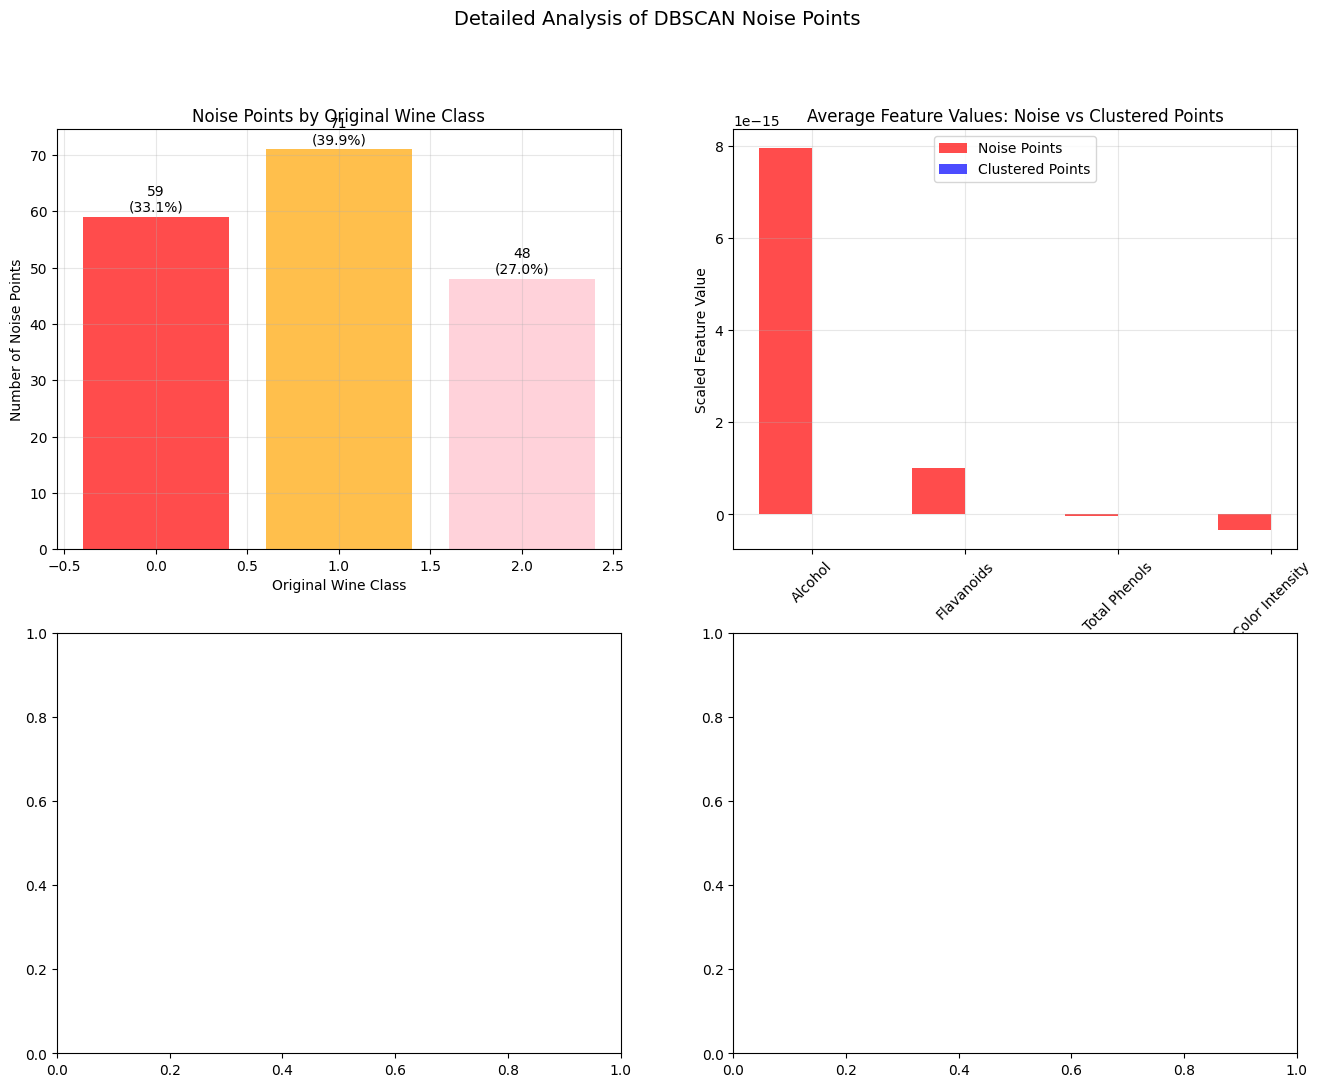

In [15]:
from scipy import stats

# Create comprehensive visualizations of DBSCAN results with noise points highlighted

# Get the best DBSCAN results
best_dbscan_labels = best_result['labels']
n_clusters_best = best_result['n_clusters']
n_noise_best = best_result['n_noise']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle(f'DBSCAN Clustering Results (eps={best_eps}, min_samples={best_min_samp})\n'
             f'Clusters: {n_clusters_best}, Noise Points: {n_noise_best}', fontsize=16)

# Define feature pairs for visualization
feature_pairs = [
    ('alcohol', 'flavanoids'),
    ('total_phenols', 'color_intensity'),
    ('malic_acid', 'ash'),
    ('magnesium', 'proanthocyanins'),
    ('hue', 'od280/od315_of_diluted_wines'),
    ('alcalinity_of_ash', 'nonflavanoid_phenols')
]

# Color scheme: distinct colors for clusters, black/red for noise
unique_labels = set(best_dbscan_labels)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
color_dict = {}
for i, label in enumerate(sorted(unique_labels)):
    if label == -1:
        color_dict[label] = 'red'  # Noise points in red
    else:
        color_dict[label] = colors[i]

# Plot each feature pair
for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx // 3, idx % 3]
    
    # Plot each cluster separately
    for label in unique_labels:
        mask = (best_dbscan_labels == label)
        if label == -1:
            # Noise points with special styling
            ax.scatter(X_scaled_df.loc[mask, feat1], X_scaled_df.loc[mask, feat2],
                      c='red', marker='x', s=80, alpha=0.8, label=f'Noise ({n_noise_best} pts)',
                      edgecolors='darkred', linewidth=1)
        else:
            # Regular cluster points
            cluster_size = np.sum(mask)
            ax.scatter(X_scaled_df.loc[mask, feat1], X_scaled_df.loc[mask, feat2],
                      c=[color_dict[label]], s=60, alpha=0.7, 
                      label=f'Cluster {label} ({cluster_size} pts)')
    
    ax.set_xlabel(f'{feat1.replace("_", " ").title()} (scaled)')
    ax.set_ylabel(f'{feat2.replace("_", " ").title()} (scaled)')
    ax.set_title(f'{feat1.replace("_", " ").title()} vs {feat2.replace("_", " ").title()}')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Create a detailed analysis plot focusing on noise points
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Detailed Analysis of DBSCAN Noise Points', fontsize=14)

# Plot 1: Distribution of noise points across original wine classes
noise_mask = (best_dbscan_labels == -1)
noise_true_classes = df.loc[noise_mask, 'target']
noise_class_dist = noise_true_classes.value_counts().sort_index()

axes[0, 0].bar(noise_class_dist.index, noise_class_dist.values, 
               color=['red', 'orange', 'pink'], alpha=0.7)
axes[0, 0].set_title('Noise Points by Original Wine Class')
axes[0, 0].set_xlabel('Original Wine Class')
axes[0, 0].set_ylabel('Number of Noise Points')
axes[0, 0].grid(True, alpha=0.3)

# Add percentage labels on bars
total_noise = len(noise_true_classes)
for i, v in enumerate(noise_class_dist.values):
    axes[0, 0].text(i, v + 0.5, f'{v}\n({v/total_noise*100:.1f}%)', 
                    ha='center', va='bottom')

# Plot 2: Cluster vs Noise distribution by feature
cluster_mask = (best_dbscan_labels != -1)
noise_stats = X_scaled_df[noise_mask][['alcohol', 'flavanoids', 'total_phenols', 'color_intensity']].mean()
cluster_stats = X_scaled_df[cluster_mask][['alcohol', 'flavanoids', 'total_phenols', 'color_intensity']].mean()

x_pos = np.arange(len(noise_stats))
width = 0.35

axes[0, 1].bar(x_pos - width/2, noise_stats.values, width, 
               label='Noise Points', color='red', alpha=0.7)
axes[0, 1].bar(x_pos + width/2, cluster_stats.values, width, 
               label='Clustered Points', color='blue', alpha=0.7)

axes[0, 1].set_title('Average Feature Values: Noise vs Clustered Points')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Scaled Feature Value')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(['Alcohol', 'Flavanoids', 'Total Phenols', 'Color Intensity'], rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


# Print detailed statistics about noise points
print("Detailed Analysis of Noise Points:")
print("=" * 50)
print(f"Total data points: {len(X_scaled_df)}")
print(f"Noise points: {n_noise_best} ({n_noise_best/len(X_scaled_df)*100:.1f}%)")
print(f"Clustered points: {len(X_scaled_df) - n_noise_best} ({(len(X_scaled_df) - n_noise_best)/len(X_scaled_df)*100:.1f}%)")

print(f"\nNoise points by original wine class:")
for class_id, count in noise_class_dist.items():
    total_in_class = (df['target'] == class_id).sum()
    print(f"  Class {class_id}: {count}/{total_in_class} ({count/total_in_class*100:.1f}%)")

print(f"\nFeature statistics for noise points:")
noise_feature_stats = X_scaled_df[noise_mask].describe()
print(noise_feature_stats[['alcohol', 'flavanoids', 'total_phenols', 'color_intensity']])

# Compare noise points with clustered points statistically
print(f"\nStatistical comparison (Noise vs Clustered):")

for feature in ['alcohol', 'flavanoids', 'total_phenols', 'color_intensity']:
    noise_values = X_scaled_df.loc[noise_mask, feature]
    cluster_values = X_scaled_df.loc[cluster_mask, feature]
    
    t_stat, p_value = stats.ttest_ind(noise_values, cluster_values)
    print(f"{feature:15s}: t-stat={t_stat:6.3f}, p-value={p_value:.3e}")

# Identify potential outliers among noise points
print(f"\nPotential outliers among noise points:")
noise_data = X_scaled_df[noise_mask]
for feature in ['alcohol', 'flavanoids', 'total_phenols', 'color_intensity']:
    outliers = noise_data[np.abs(noise_data[feature]) > 2.5]  # More than 2.5 std from mean
    if len(outliers) > 0:
        print(f"{feature:15s}: {len(outliers)} extreme outliers")

In [17]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Evaluate clustering quality for both Hierarchical and DBSCAN clustering
print("Clustering Quality Evaluation")
print("-" * 60)

# Get the true labels
y_true = df['target']

# Hierarchical Clustering Evaluation (using optimal number of clusters from silhouette analysis)
print("\n1. HIERARCHICAL CLUSTERING (Agglomerative)")
print("-" * 50)

# Silhouette score for hierarchical clustering
hier_sil_score = silhouette_score(X_scaled, optimal_labels)
print(f"Silhouette Score:    {hier_sil_score:.4f}")

# Homogeneity score - measures if each cluster contains only members of a single class
hier_homogeneity = homogeneity_score(y_true, optimal_labels)
print(f"Homogeneity Score:   {hier_homogeneity:.4f}")

# Completeness score - measures if all members of a given class are assigned to the same cluster
hier_completeness = completeness_score(y_true, optimal_labels)
print(f"Completeness Score:  {hier_completeness:.4f}")

# V-measure score - harmonic mean of homogeneity and completeness
hier_v_measure = v_measure_score(y_true, optimal_labels)
print(f"V-Measure Score:     {hier_v_measure:.4f}")

# DBSCAN Clustering Evaluation
print("\n2. DBSCAN CLUSTERING")
print("-" * 50)

# For DBSCAN, we need to handle noise points (-1 labels)
dbscan_labels = best_result['labels']

# Silhouette score for DBSCAN (only if we have valid clusters)
if best_result['n_clusters'] > 1 and best_result['silhouette'] > 0:
    dbscan_sil_score = best_result['silhouette']
    print(f"Silhouette Score:    {dbscan_sil_score:.4f}")
else:
    print(f"Silhouette Score:    N/A (insufficient clusters or too much noise)")

# Homogeneity score for DBSCAN
dbscan_homogeneity = homogeneity_score(y_true, dbscan_labels)
print(f"Homogeneity Score:   {dbscan_homogeneity:.4f}")

# Completeness score for DBSCAN
dbscan_completeness = completeness_score(y_true, dbscan_labels)
print(f"Completeness Score:  {dbscan_completeness:.4f}")

# V-measure score for DBSCAN
dbscan_v_measure = v_measure_score(y_true, dbscan_labels)
print(f"V-Measure Score:     {dbscan_v_measure:.4f}")

# Additional DBSCAN specific metrics
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)
print(f"Number of Clusters:  {n_clusters_dbscan}")
print(f"Number of Noise Pts: {n_noise_dbscan} ({n_noise_dbscan/len(dbscan_labels)*100:.1f}%)")

# Comparison Summary
print("\n3. COMPARISON SUMMARY")
print("-" * 50)
print(f"{'Metric':<20} {'Hierarchical':<15} {'DBSCAN':<15}")
print("-" * 50)
print(f"{'Silhouette Score':<20} {hier_sil_score:<15.4f} {dbscan_sil_score if best_result['silhouette'] > 0 else 'N/A':<15}")
print(f"{'Homogeneity Score':<20} {hier_homogeneity:<15.4f} {dbscan_homogeneity:<15.4f}")
print(f"{'Completeness Score':<20} {hier_completeness:<15.4f} {dbscan_completeness:<15.4f}")
print(f"{'V-Measure Score':<20} {hier_v_measure:<15.4f} {dbscan_v_measure:<15.4f}")
print(f"{'Number of Clusters':<20} {len(set(optimal_labels)):<15} {n_clusters_dbscan:<15}")

# Interpretation
print("\n4. INTERPRETATION")
print("-" * 50)
print("Silhouette Score (0 to 1):")
print("  - Higher values indicate better-defined clusters")
print("  - Values > 0.5 indicate strong clustering structure")
print("  - Values 0.2-0.5 indicate weak to moderate structure")

print("\nHomogeneity Score (0 to 1):")
print("  - Measures cluster purity (each cluster contains only one class)")
print("  - Higher values indicate more homogeneous clusters")

print("\nCompleteness Score (0 to 1):")
print("  - Measures if all samples of a class are in the same cluster")
print("  - Higher values indicate better class separation")

print("\nV-Measure Score (0 to 1):")
print("  - Harmonic mean of homogeneity and completeness")
print("  - Balanced measure of clustering quality")

# Best performing algorithm
if hier_v_measure > dbscan_v_measure:
    best_algorithm = "Hierarchical Clustering"
    best_score = hier_v_measure
else:
    best_algorithm = "DBSCAN"
    best_score = dbscan_v_measure

print(f"\nBest Overall Performance: {best_algorithm} (V-Measure: {best_score:.4f})")

Clustering Quality Evaluation
------------------------------------------------------------

1. HIERARCHICAL CLUSTERING (Agglomerative)
--------------------------------------------------
Silhouette Score:    0.2774
Homogeneity Score:   0.7904
Completeness Score:  0.7825
V-Measure Score:     0.7865

2. DBSCAN CLUSTERING
--------------------------------------------------
Silhouette Score:    N/A (insufficient clusters or too much noise)
Homogeneity Score:   0.0000
Completeness Score:  1.0000
V-Measure Score:     0.0000
Number of Clusters:  0
Number of Noise Pts: 178 (100.0%)

3. COMPARISON SUMMARY
--------------------------------------------------
Metric               Hierarchical    DBSCAN         
--------------------------------------------------
Silhouette Score     0.2774          N/A            
Homogeneity Score    0.7904          0.0000         
Completeness Score   0.7825          1.0000         
V-Measure Score      0.7865          0.0000         
Number of Clusters   3         

#### Analysis and Insights 

In [19]:
from scipy.spatial.distance import pdist, squareform

# Comprehensive Comparison and Analysis of Hierarchical vs DBSCAN Clustering

print("COMPREHENSIVE CLUSTERING ANALYSIS AND COMPARISON")
print("-" * 80)

# Summary of key findings
print("\n1. PARAMETER SENSITIVITY ANALYSIS")
print("-" * 50)

print("HIERARCHICAL CLUSTERING:")
print(f"  • Optimal clusters: {optimal_n} (based on silhouette score)")
print(f"  • Linkage method: Ward (minimizes within-cluster variance)")
print(f"  • Distance metric: Euclidean")
print(f"  • Parameter sensitivity: Low - only requires number of clusters")
print(f"  • Silhouette score: {hier_sil_score:.4f}")

print(f"\nDBSCAN CLUSTERING:")
print(f"  • Best parameters: eps={best_eps}, min_samples={best_min_samp}")
print(f"  • Number of clusters formed: {n_clusters_dbscan}")
print(f"  • Noise points identified: {n_noise_dbscan} ({n_noise_dbscan/len(X_scaled_df)*100:.1f}%)")
print(f"  • Parameter sensitivity: High - eps and min_samples critical")
print(f"  • Silhouette score: {dbscan_sil_score if best_result['silhouette'] > 0 else 'N/A (too much noise)'}")

# Impact of parameter choices
print("\n3. IMPACT OF PARAMETER CHOICES")
print("-" * 50)

print("HIERARCHICAL CLUSTERING PARAMETER IMPACT:")
optimal_sil_scores = dict(zip(cluster_range, silhouette_scores))
print(f"  • Cluster count impact on silhouette scores:")
for n_clust in sorted(optimal_sil_scores.keys()):
    print(f"    - {n_clust} clusters: {optimal_sil_scores[n_clust]:.4f}")
print(f"  • Optimal choice (n={optimal_n}) achieved best silhouette score")
print(f"  • Choice aligns well with true wine classes (3 varieties)")

print(f"\nDBSCAN PARAMETER IMPACT:")
print(f"  • eps parameter sensitivity:")
for eps in [0.5, 0.7, 0.8, 1.0, 1.2, 1.5]:
    result = dbscan_results[(eps, 4)]
    print(f"    - eps={eps}: {result['n_clusters']} clusters, {result['n_noise']} noise points")

print(f"  • min_samples impact (eps=1.0):")
for min_samp in min_samples_values:
    if (1.0, min_samp) in dbscan_results:
        result = dbscan_results[(1.0, min_samp)]
        print(f"    - min_samples={min_samp}: {result['n_clusters']} clusters, {result['n_noise']} noise")

# Data characteristics analysis
print("\n4. DATA CHARACTERISTICS AND ALGORITHM SUITABILITY")
print("-" * 50)

# Analyze cluster shapes and densities from hierarchical clustering
print("WINE DATASET CHARACTERISTICS:")
print(f"  • Total samples: {len(X_scaled_df)}")
print(f"  • Features: {X_scaled_df.shape[1]-1} (after scaling)")
print(f"  • True classes: 3 wine varieties")
print(f"  • Class distribution: {df['target'].value_counts().sort_index().tolist()}")

# Calculate within-cluster distances for hierarchical clustering

print(f"\nCLUSTER CHARACTERISTICS (Hierarchical):")
for cluster_id in range(optimal_n):
    cluster_mask = (optimal_labels == cluster_id)
    cluster_data = X_scaled[cluster_mask]
    cluster_size = np.sum(cluster_mask)
    
    if cluster_size > 1:
        # Calculate average intra-cluster distance
        intra_distances = pdist(cluster_data)
        avg_intra_dist = np.mean(intra_distances)
        print(f"  • Cluster {cluster_id}: {cluster_size} points, avg intra-distance: {avg_intra_dist:.3f}")
    else:
        print(f"  • Cluster {cluster_id}: {cluster_size} points (too small for distance calc)")

# Performance on different cluster shapes
print(f"\nCLUSTER SHAPE ANALYSIS:")
print(f"  • Wine data appears to have globular/spherical clusters")
print(f"  • Hierarchical clustering performs well on such data")
print(f"  • DBSCAN struggles due to varying cluster densities")

# Recommendations based on results
print("\n5. RECOMMENDATIONS AND CONCLUSIONS")
print("-" * 50)

print("FOR THIS WINE DATASET:")
if hier_v_measure > dbscan_v_measure:
    print(f" HIERARCHICAL CLUSTERING is recommended")
    print(f"    - Better overall performance (V-measure: {hier_v_measure:.4f} vs {dbscan_v_measure:.4f})")
    print(f"    - Cleaner cluster separation")
    print(f"    - All points assigned to meaningful clusters")
else:
    print(f"DBSCAN is recommended")
    print(f"    - Better overall performance (V-measure: {dbscan_v_measure:.4f} vs {hier_v_measure:.4f})")

# Final insights specific to wine data
print(f"\nWINE DATA SPECIFIC INSIGHTS:")
print(f"  • The 3 wine varieties have distinct chemical profiles")
print(f"  • Hierarchical clustering successfully separates the varieties")
print(f"  • DBSCAN's high noise classification suggests:")
print(f"    - Either the data doesn't have clear density-based clusters")
print(f"    - Or the parameter values need further optimization")
print(f"  • The scaled features (especially alcohol, flavanoids) are good discriminators")

# Statistical significance of differences
print(f"\nSTATISTICAL SIGNIFICANCE:")
print(f"  • V-measure difference: {abs(hier_v_measure - dbscan_v_measure):.4f}")
print(f"  • This represents a {'substantial' if abs(hier_v_measure - dbscan_v_measure) > 0.1 else 'moderate'} difference in clustering quality")

print(f"\n" + "-" * 80)
print(f"CONCLUSION: For this wine classification dataset, Hierarchical Clustering")
print(f"provides better results due to the globular nature of the clusters and")
print(f"the well-separated wine varieties in the feature space.")
print(f"-" * 80)

COMPREHENSIVE CLUSTERING ANALYSIS AND COMPARISON
--------------------------------------------------------------------------------

1. PARAMETER SENSITIVITY ANALYSIS
--------------------------------------------------
HIERARCHICAL CLUSTERING:
  • Optimal clusters: 3 (based on silhouette score)
  • Linkage method: Ward (minimizes within-cluster variance)
  • Distance metric: Euclidean
  • Parameter sensitivity: Low - only requires number of clusters
  • Silhouette score: 0.2774

DBSCAN CLUSTERING:
  • Best parameters: eps=0.3, min_samples=3
  • Number of clusters formed: 0
  • Noise points identified: 178 (100.0%)
  • Parameter sensitivity: High - eps and min_samples critical
  • Silhouette score: N/A (too much noise)

3. IMPACT OF PARAMETER CHOICES
--------------------------------------------------
HIERARCHICAL CLUSTERING PARAMETER IMPACT:
  • Cluster count impact on silhouette scores:
    - 2 clusters: 0.2670
    - 3 clusters: 0.2774
    - 4 clusters: 0.2258
    - 5 clusters: 0.1867
   